In [1]:
import numpy as np
import pandas as pd
import glob
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file_path = '/content/drive/My Drive/C Lab/*.csv'

#file_path = '/content/drive/My Drive/C Lab/*.csv'
files = glob.glob(file_path)

#def light_speed(f, L, delta_omega, d)
#  return (f*4L*delta_omega)/d

#for curr_file in files:
  #df = pd.read_csv(curr_file)

df = pd.read_csv('/C_Lab/C_Data/single_pass_data.csv')
delta_omega = (df['freq2']-df['freq1'])*np.pi
f = 16.9
# *****placeholder measurment used in df was 17.5 in, actual measurement is 16.9 in 
L = (df['Lc'] + df['Ls'])/100
d = df['d']

C1 = (f*2*L*delta_omega)/d
#print('Single Pass')
#print(C1)

df = pd.read_csv('/C_Lab/C_Data/double_pass_data.csv')
delta_omega = (df['freq2']-df['freq1'])*np.pi
f = 16.9
L = (df['Lc'] + df['Ls'])/100
d = df['d']

C2 = (f*2*L*delta_omega)/d
#print('Double Pass')
#print(C2)

df = pd.read_csv('/C_Lab/C_Data/triple_pass_data.csv')
delta_omega = (df['freq2']-df['freq1'])*np.pi
f = 16.9
L = (df['Lc'] + df['Ls'])/100
d = df['d']

C3 = (f*2*L*delta_omega)/d
#print('Triple Pass')
#print(C3)

avg_C1 = np.mean(C1)
avg_C2 = np.mean(C2)
avg_C3 = np.mean(C3)
print(avg_C1)
print(avg_C2)
print(avg_C3)
avg_C = (avg_C1 + avg_C2 + avg_C3)/3
print(avg_C)



302606923.9389288
290986786.71854246
310164911.88648754
301252874.18131953


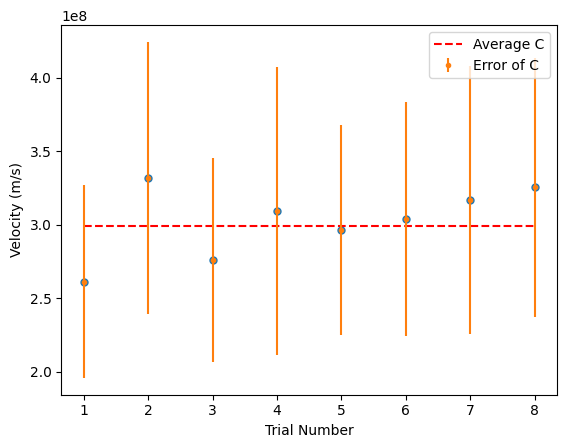

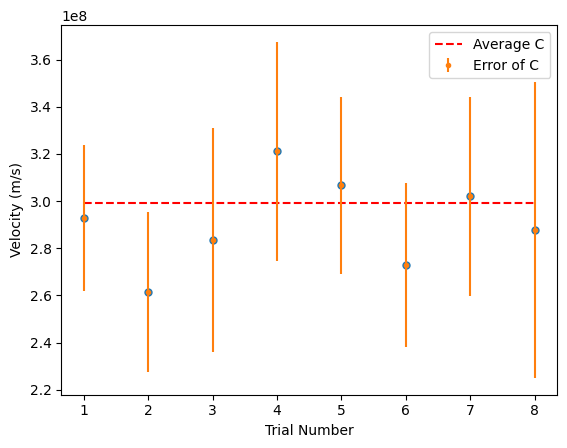

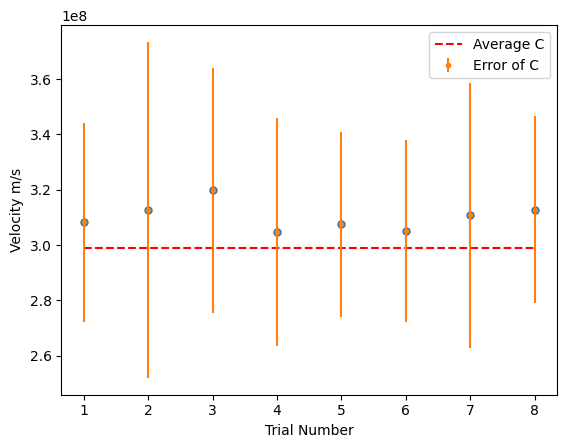

82012532.84346564


In [ ]:
#error propogation


df = pd.read_csv('/C_Lab/C_Data/single_pass_data.csv')
delta_omega = (df['freq2']-df['freq1'])*np.pi
f = 16.9
L = (df['Lc'] + df['Ls'])/100
d = df['d']

C1 = (f*2*L*delta_omega)/d

dCdL = (f*2*delta_omega)/d
dCdf = (2*L*delta_omega)/d
dCdw = (f*2*L)/d
dCdd = (-1*f*2*L*delta_omega)/(d**2)

s2_L = 1**2
s2_f = 0.2**2
s2_d = 0.005**2
s2_w = 10**2

prop_error2 = ((dCdL**2) * s2_L) + ((dCdf**2) * s2_f) + ((dCdw**2) * s2_w) + ((dCdd**2) * s2_d)
prop_error01 = np.sqrt(prop_error2)

single_stop_data = C1
DataSet1 = np.arange(1, len(single_stop_data) + 1, 1)
fig = plt.figure()
plt.plot(DataSet1, single_stop_data, linewidth = 0, marker = '.', markersize = 10)
plt.plot(DataSet1, np.ones(len(DataSet1)) * 2.99E8, '--r', label = 'Average C')
#plt.title('Single Stop')
plt.xlabel('Trial Number')
plt.ylabel('Velocity (m/s)')

plt.errorbar(DataSet1, C1, yerr = prop_error01, fmt = '.', label = 'Error of C')
plt.legend()
plt.show()
################################################################################

df = pd.read_csv('/C_Lab/C_Data/double_pass_data.csv')
delta_omega = (df['freq2']-df['freq1'])*np.pi
f = 16.9
L = (df['Lc'] + df['Ls'])/100
d = df['d']

C2 = (f*2*L*delta_omega)/d

dCdL = (f*2*delta_omega)/d
dCdf = (2*L*delta_omega)/d
dCdw = (f*2*L)/d
dCdd = (-1*f*2*L*delta_omega)/(d**2)

s2_L = 1**2
s2_f = 0.2**2
s2_d = 0.005**2
s2_w = 10**2

prop_error2 = ((dCdL**2) * s2_L) + ((dCdf**2) * s2_f) + ((dCdw**2) * s2_w) + ((dCdd**2) * s2_d)
prop_error02 = np.sqrt(prop_error2)

double_stop_data = C2
DataSet2 = np.arange(1, len(double_stop_data) + 1, 1)
fig = plt.figure()
plt.plot(DataSet2, double_stop_data, linewidth = 0, marker = '.', markersize = 10)
plt.plot(DataSet2, np.ones(len(DataSet1)) * 2.99E8, '--r', label = 'Average C')
#plt.title('Double Stop')
plt.xlabel('Trial Number')
plt.ylabel('Velocity (m/s)')

plt.errorbar(DataSet2, C2, yerr = prop_error02, fmt = '.', label = 'Error of C')
plt.legend()
plt.show()
################################################################################

df = pd.read_csv('/C_Lab/C_Data/triple_pass_data.csv')
delta_omega = (df['freq2']-df['freq1'])*np.pi
f = 16.9
L = (df['Lc'] + df['Ls'])/100
d = df['d']

C3 = (f*2*L*delta_omega)/d

dCdL = (f*2*delta_omega)/d
dCdf = (2*L*delta_omega)/d
dCdw = (f*2*L)/d
dCdd = (-1*f*2*L*delta_omega)/(d**2)

s2_L = 1**2
s2_f = 0.2**2
s2_d = 0.005**2
s2_w = 10**2

prop_error2 = ((dCdL**2) * s2_L) + ((dCdf**2) * s2_f) + ((dCdw**2) * s2_w) + ((dCdd**2) * s2_d)
prop_error03 = np.sqrt(prop_error2)


triple_stop_data = C3
DataSet3 = np.arange(1, len(triple_stop_data) + 1, 1)
fig = plt.figure()
plt.plot(DataSet3, triple_stop_data, linewidth = 0, marker = '.', markersize = 10)
plt.plot(DataSet3, np.ones(len(DataSet1)) * 2.99E8, '--r', label = 'Average C')
#plt.title('Triple Stop')
plt.xlabel('Trial Number')
plt.ylabel('Velocity m/s')

plt.errorbar(DataSet3, C3, yerr = prop_error03, fmt = '.', label = 'Error of C')
plt.legend()
plt.show()

################################################################################
avg_err01 = np.mean(prop_error01)
avg_err02 = np.mean(prop_error02)
avg_err03 = np.mean(prop_error03)
avg_err = (avg_err01 + avg_err02 + avg_err03)/3
print(avg_err01)

